<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/pytorch_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
trainset = datasets.FashionMNIST(root = './', train = True, download = True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = trainset, batch_size = 32, shuffle = True)

100%|██████████| 26421880/26421880 [00:01<00:00, 18236459.65it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 338914.29it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6162399.76it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8427898.90it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [4]:
#오토인코더 모듈
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [5]:
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
criterion = nn.MSELoss()

In [6]:
def train(model, train_loader):
    model.train()
    for step, (data, label) in enumerate(train_loader):
        x = data.view(-1, 28*28).to(device)
        y = data.view(-1, 28*28).to(device)
        label = label.to(device)

        encoded, decoded = model(x)
        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [7]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.

Epoch : 1


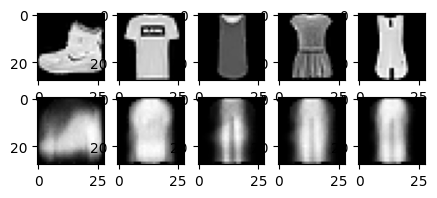

Epoch : 2


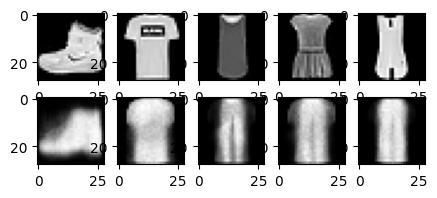

Epoch : 3


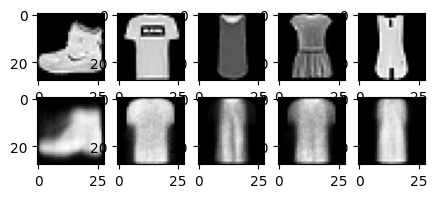

Epoch : 4


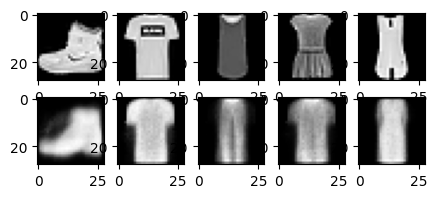

Epoch : 5


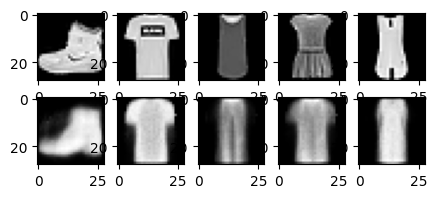

Epoch : 6


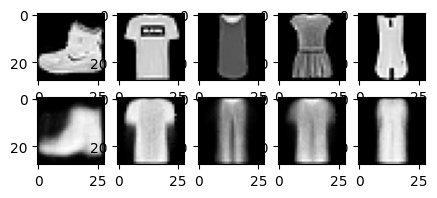

Epoch : 7


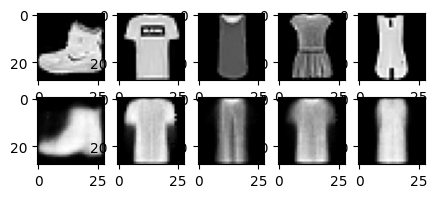

Epoch : 8


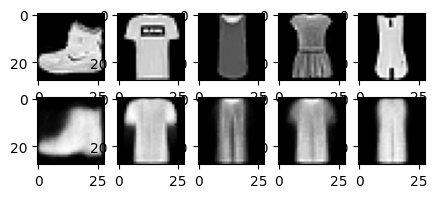

Epoch : 9


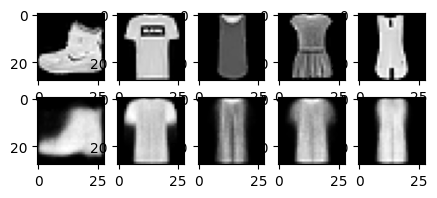

Epoch : 10


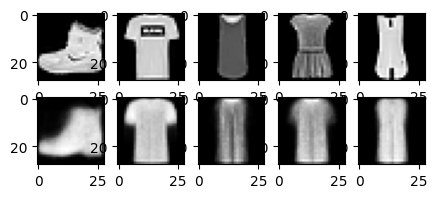

Epoch : 11


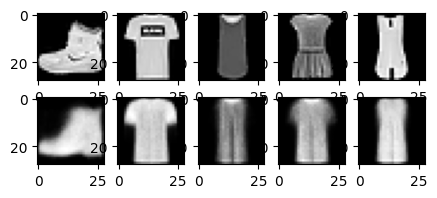

Epoch : 12


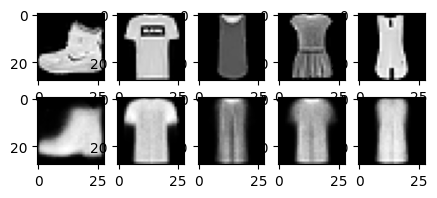

Epoch : 13


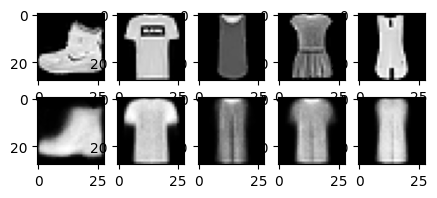

Epoch : 14


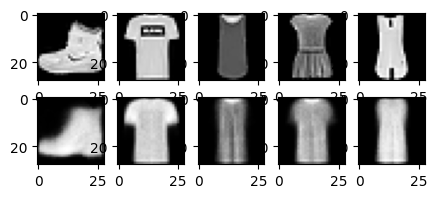

Epoch : 15


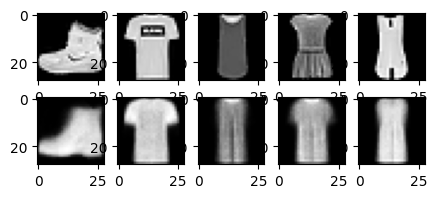

Epoch : 16


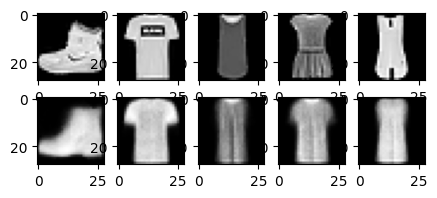

Epoch : 17


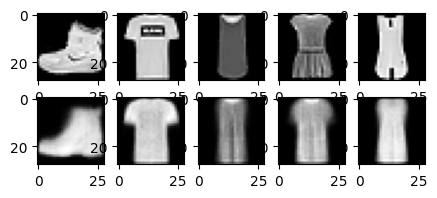

Epoch : 18


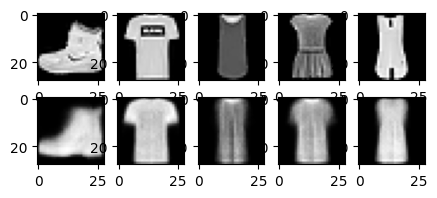

Epoch : 19


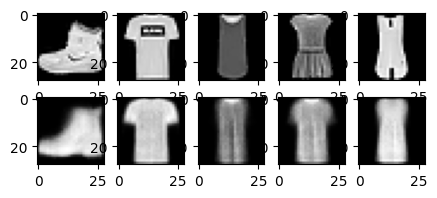

Epoch : 20


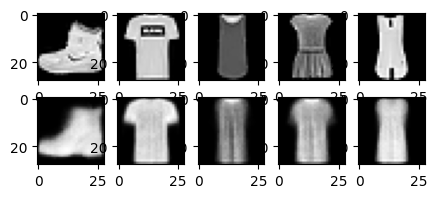

In [8]:
for epoch in range(20):
    train(model, train_loader)

    test_x = view_data.to(device)
    _, decoded_data = model(test_x)

    f, a = plt.subplots(2, 5, figsize = (5, 2))

    print(f'Epoch : {epoch+1}')
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28))
        a[0][i].imshow(img, cmap = 'gray')

    for i in range(5):
        img = np.reshape(decoded_data.to('cpu').data.numpy()[i],(28, 28))
        a[1][i].imshow(img, cmap = 'gray')

    plt.show()


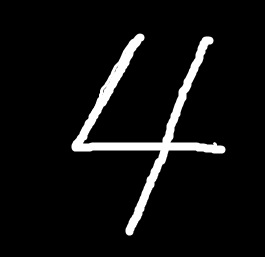

In [9]:
from PIL import Image
img = Image.open('four.jpg')
img

In [10]:
img = transforms.ToTensor()(img)
img = transforms.Resize(28)(img)
img = transforms.Grayscale()(img)
img.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 28, 28])

In [11]:
img = img.unsqueeze(0)
img.size()

torch.Size([1, 1, 28, 28])

In [12]:
img = img.view(-1, 28*28).to(device)
img.size()

torch.Size([1, 784])

In [13]:
_, pred = model(img)
img = np.reshape(pred.to('cpu').data.numpy()[0],(28, 28))
img.shape

(28, 28)

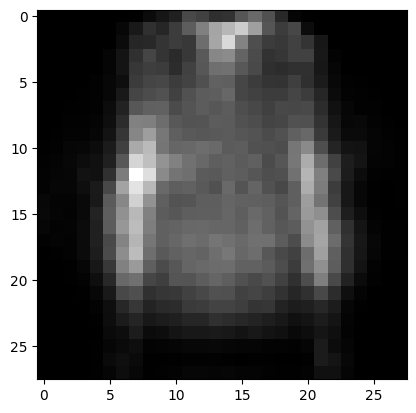

In [14]:
plt.imshow(img, cmap = 'gray')

In [15]:
#z(latent space) 3차원 그래프 시각화
view_data = trainset.data[:200].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.
test_x = view_data.to(device) #gpu
encoded_data, _ = model(test_x)
encoded_data = encoded_data.to('cpu')

In [16]:
test_x.size()

torch.Size([200, 784])

In [17]:
encoded_data.size()

torch.Size([200, 3])

In [18]:
encoded_data[0]

tensor([-6.7034, 40.6078, 21.6740], grad_fn=<SelectBackward0>)

In [23]:
img = model.decoder(torch.tensor([17. , -36. , 27.]).to(device))

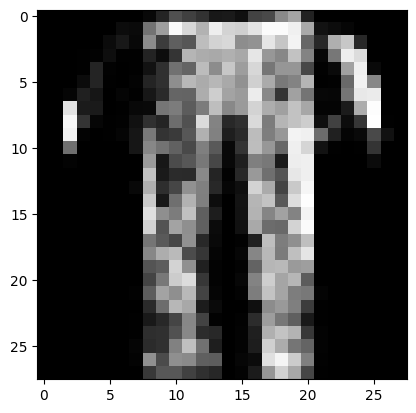

In [24]:
plt.figure()
img = np.reshape(img.to('cpu').data.numpy(),(28,28))
plt.imshow(img,cmap='gray')

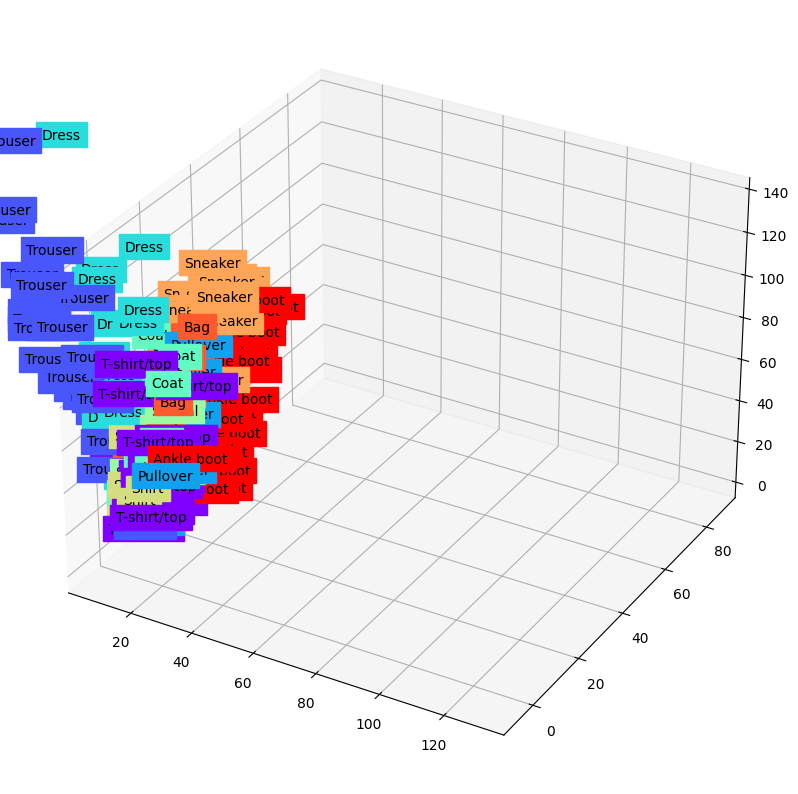

In [34]:
from mpl_toolkits.mplot3d import axes3d

CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig = plt.figure(figsize=(10,40))
ax = fig.add_subplot(projection='3d')

X = encoded_data.data[:,0].numpy()
Y = encoded_data.data[:,1].numpy()
Z = encoded_data.data[:,2].numpy()

labels = trainset.targets[:200].numpy()

for x,y,z,s in zip(X,Y,Z,labels):
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x,y,z,name,backgroundcolor=color)

plot_data = ax.scatter(X,Y,Z,color='red')

ax.set_xlim(X.min(),X.max())
ax.set_xlim(Y.min(),Y.max())
ax.set_xlim(Z.min(),Z.max())

plt.show()